In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.io
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [2]:
def fslope(slope, chi1, chi0, bound0):
    return bound0*np.exp(slope*(np.log(chi1)-np.log(chi0)))

def fexpslope(power, L1, L0, bound0):
    return bound0*np.exp(-(L1/L0)**power)

In [3]:
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

/var/folders/0h/qqn4knqj35j78xwx0j8np1540000gn/T/ipykernel_14447/2509168485.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


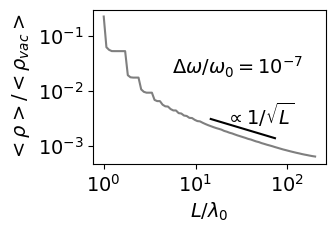

In [4]:
Rlist = np.loadtxt('DATA_PRL/TMcyl_chi4+1e-1j_dwQ1e7_Rsweep0p5to100_logspaced_80pts_gpr1200_R.txt')
invdes_vals = np.loadtxt('DATA_PRL/TMcyl_chi4+1e-1j_dwQ1e7_Rsweep0p5to100_logspaced_80pts_gpr1200_LDOS_sca_enh.txt')
invdes_vals = 1-invdes_vals

plt.figure(figsize=(3,2))
plt.rc('font', size=14)
plt.plot(2*Rlist, invdes_vals, color='#7f7f7f')

#plot slope
end_ind = len(invdes_vals) - 15
ind_width = 25
start_ind = end_ind - ind_width
slopeRlist = Rlist[start_ind:end_ind]
slopeBounds = np.array(list(map(lambda R: fslope(-.5, R, Rlist[start_ind], 1.35*invdes_vals[start_ind]), slopeRlist)))
plt.plot(2*slopeRlist, slopeBounds, color='black')
plt.annotate('$\propto 1/\sqrt{L}$', (2*Rlist[end_ind - ind_width//2], invdes_vals[end_ind - ind_width//2]), # these are the coordinates to position the label
                 xytext=(10,10), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

plt.annotate('$\Delta\omega/\omega_{0} = 10^{-7}$', (2*Rlist[-30], 0.02), # these are the coordinates to position the label
                 xytext=(0,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center


plt.xscale('log')
plt.yscale('log')
# plt.title('$\chi = 4 + 0.1i, ~ \Delta\omega/\omega_{0} = \\frac{1}{2\cdot 10^6}$')
ax = plt.axes()
plt.xticks([1,10,100])
plt.yticks([1e-1,1e-2,1e-3])
plt.xlabel('$L/\lambda_{0}$')
plt.ylabel('$<\\rho>/<\\rho_{vac}>$')
plt.savefig('minLDOS_TM_chi4+1e-1j_gpr1200_dwQsrc1e7_Rsweep_cylindrical.pdf', bbox_inches='tight')

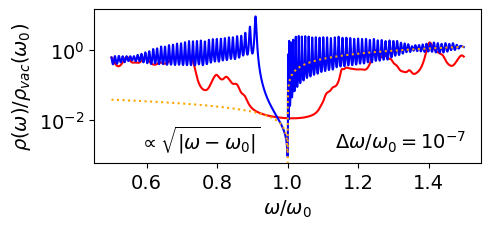

In [5]:
#Combined
###spectrum
#filenames = ['DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_periodicfullspace5by5_period1_maxeval1000_Wfunc_normalized_vacstart_Qabs5.0e+06_L5.0_optdof_spectrum.txt']
filenames = ['DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_periodicfullspace10by10_period1_maxeval500_Wfunc_normalized_vacstart_Qabs5.0e+06_L10.0_optdof_spectrum.txt']

ldos_list = np.loadtxt(filenames[0])
omegas = np.linspace(-1/2, 1/2, len(ldos_list)) + 1
plt.figure(figsize=(5,2))
plt.rc('font', size=14)
plt.plot(omegas, ldos_list, color='red')


####plot circular results
filenames = ['DATA_PRL/TMcyl_chi4+1e-1j_R40_gpr1200_Qsrc5.0e+06_optdof_spectrum.npy']
ldos_list = np.load(filenames[0])
omegas = np.linspace(-1/2, 1/2, len(ldos_list)) + 1
plt.rc('font', size=14)
plt.plot(omegas, ldos_list, color='blue')

indC = len(ldos_list)//2
indL = indC - 40
indL = 0
indR = indC + 120
indR = len(ldos_list) - 1
ldos_avgR = np.median(ldos_list[indR-100:indR])
# ldos_avgR = ldos_list[indR]
prefactorR = ldos_avgR/np.sqrt(omegas[indR] - omegas[indC])
plt.plot(omegas[indC:indR], prefactorR*np.sqrt(omegas[indC:indR] - omegas[indC]), label='$\propto \sqrt{\omega - \omega_{0}}$', color='orange', linestyle='dotted')

prefactorindL = indC - 45
prefactorL = ldos_list[prefactorindL]/np.sqrt(omegas[indC] - omegas[prefactorindL])
plt.plot(omegas[indL:indC], prefactorL*np.sqrt(omegas[indC] - omegas[indL:indC]), label='$\propto \sqrt{\omega_{0} - \omega}$', color='orange', linestyle='dotted')

#######
# plt.annotate('$L/\lambda_{0} = 6$', (1.32, ldos_list[-1]/10**2), # these are the coordinates to position the label
#                  xytext=(0,0), # distance from text to points (x,y)
#                  textcoords="offset points",
#                  ha='center') # horizontal alignment can be left, right or center

plt.annotate('$\Delta\omega/\omega_{0} = 10^{-7}$', (1.32, 0.0015), # these are the coordinates to position the label
                 xytext=(0,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

plt.annotate('$\propto \sqrt{|\omega - \omega_{0}|}$', (omegas[len(ldos_list)//4], 0.0015), # these are the coordinates to position the label
                 xytext=(0,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

plt.xlabel('$\omega/\omega_{0}$')
plt.ylabel('$\\rho(\omega)/\\rho_{vac}(\omega_{0})$')
# plt.locator_params(axis='y', nbins=6)
# plt.locator_params(axis='x', nbins=6)
plt.yscale('log')
plt.yticks([1e0,1e-2])
# plt.xscale('log')
plt.savefig('chi4+1e-1j_circularandperiodic_Qsrc5.0e+06_optdof_spectrum.png', bbox_inches='tight')
plt.savefig('chi4+1e-1j_circularandperiodic_Qsrc5.0e+06_optdof_spectrum.pdf', bbox_inches='tight')
# plt.rc('axes', labelsize=6) 

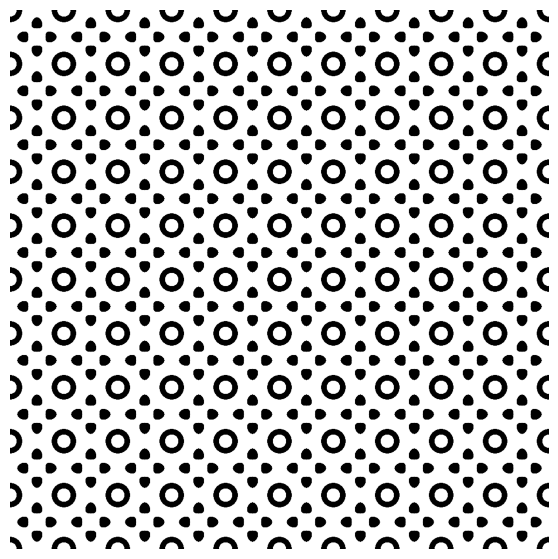

In [6]:
design_file = 'DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_periodicfullspace5by5_period1_maxeval1000_Wfunc_normalized_vacstart_Qabs5.0e+06_L5.0_optdof.txt'
design_file = 'DATA_PRL/TMLDOSmin4+1e-1j_dwQabs1e-1to1e7_periodicfullspace10by10_period1_maxeval500_Wfunc_normalized_vacstart_Qabs5.0e+06_L10.0_optdof.txt'
design = np.loadtxt(design_file)
L = int(np.sqrt(len(design)))
design = design.reshape(L, L)
plt.figure(figsize=((7,7)))
plt.imshow(design,cmap='Greys')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.savefig('minLDOS_TM_chi4+1e-1j_Qsrc5.0e+06_L5.0_period1lambda.pdf', bbox_inches='tight')

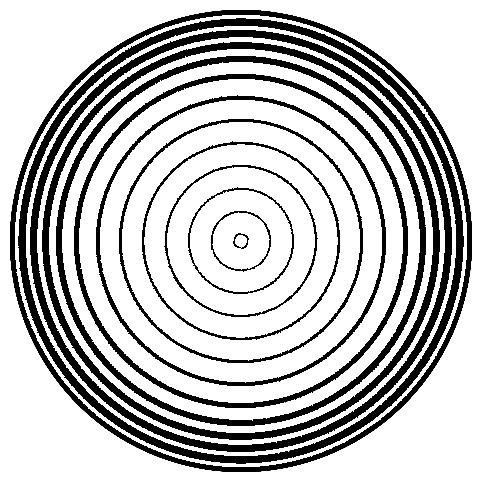

In [7]:
des_list = np.loadtxt('DATA_PRL/TMcyl_chi4+1e-1j_R5_gpr1200_Qsrc5.0e+06_optdof.txt')
# print('des_list len:', len(des_list))
# des_list = np.loadtxt('TMcyl_chi4+1e-1j_R2p5_gpr1200_Qsrc1.0e+06_optdof.txt')
###structure
fig, ax1 = plt.subplots(1, 1, figsize=(6,6))
ax1 = plt.subplot(111, projection='polar')
r_list = np.linspace(0, 1, len(des_list)) + 600

azm = np.linspace(0, 2 * np.pi, 400)
r, th = np.meshgrid(10*r_list, azm)
z = np.tile(np.absolute(des_list), (r.shape[0], 1))

col_map = plt.cm.get_cmap('gray')
col_rev = col_map.reversed()
ax1.pcolormesh(th, r, z, shading='auto', cmap=col_rev)
ax1.set_rticks([])
ax1.grid(False)
ax1.axis("off")
plt.savefig('chi4+1e-1j_R5_dwQsrc1e6_optdof.png', bbox_inches='tight')
# ax1.colorbar(label='packing fraction')

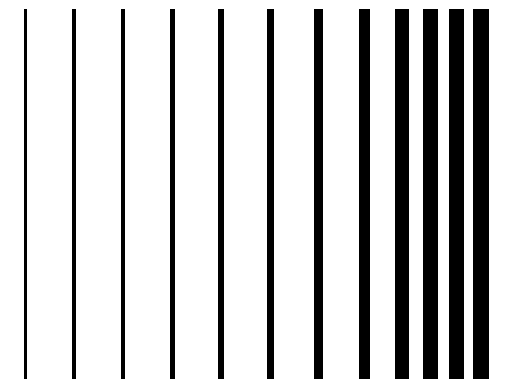

In [8]:
import matplotlib.patches as mpatches
indGrating = np.nonzero(des_list.round())
gratings = consecutive(indGrating[0])

plt.figure()
ax = plt.axes()
for i in range(len(gratings) - 1):
    xL = gratings[i][0]
    xR = gratings[i][-1]
    art = mpatches.Rectangle((xL/len(des_list), 0), (xR - xL + 1)/len(des_list), 1.0, ec="none", color='black')
    ax.add_artist(art)
plt.axis('off')
plt.savefig('chi4+1e-1j_R5_dwQsrc1e6_optdof_radial_rings.pdf', bbox_inches='tight')

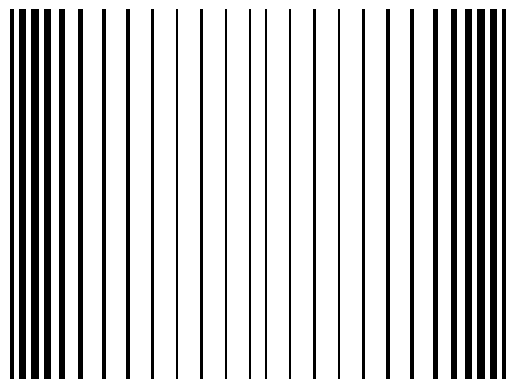

In [9]:
import matplotlib.patches as mpatches
indGrating = np.nonzero(des_list.round())
gratings = consecutive(indGrating[0])

plt.figure()
ax = plt.axes()
for i in range(len(gratings)):
    xL = gratings[i][0]
    xR = gratings[i][-1]
    art = mpatches.Rectangle((xL/len(des_list), 0), (xR - xL + 1)/len(des_list), 1.0, ec="none", color='black')
    ax.add_artist(art)
    art = mpatches.Rectangle((-xL/len(des_list), 0), -(xR - xL + 1)/len(des_list), 1.0, ec="none", color='black')
    ax.add_artist(art)
plt.xlim(-1,1)
plt.axis('off')
plt.savefig('chi4+1e-1j_R5_dwQsrc1e6_optdof_radial_rings_twosides.pdf', bbox_inches='tight')

In [10]:
(gratings[3][0] - gratings[2][0] + 1)/1200.0 #separation between rings

0.49416666666666664

In [11]:
(gratings[8][0] - gratings[7][0] + 1)/1200.0 #separation between rings

0.365

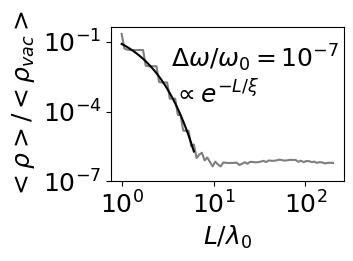

In [12]:
Rlist = np.loadtxt('DATA_PRL/TMcyl_chi4+0j_dwQ1e7_Rsweep0p5to100_logspaced_80pts_gpr1200_R.txt')
invdes_vals = np.loadtxt('DATA_PRL/TMcyl_chi4+0j_dwQ1e7_Rsweep0p5to100_logspaced_80pts_gpr1200_LDOS_sca_enh.txt')
invdes_vals = 1-invdes_vals

plt.figure(figsize=(3,2))
plt.rc('font', size=18)
plt.plot(2*Rlist, invdes_vals, color='#7f7f7f')

#plot slope
end_ind = len(invdes_vals) - 45
ind_width = 20
start_ind = end_ind - ind_width

end_ind = len(invdes_vals) - 52
start_ind = 0
ind_width = end_ind - start_ind
slopeRlist = Rlist[start_ind:end_ind]
# slopeBounds = np.array(list(map(lambda R: fslope(-9, R, Rlist[start_ind], 1.35*invdes_vals[start_ind]), slopeRlist)))
slopeBounds = np.array(list(map(lambda R: fexpslope(1, R, 0.24, 3.0*invdes_vals[start_ind]), slopeRlist)))
plt.plot(2*slopeRlist, slopeBounds, color='black')
plt.annotate('$\propto e^{-L/\\xi}$', (2*Rlist[end_ind - ind_width//8], invdes_vals[end_ind - ind_width//8]), # these are the coordinates to position the label
                 xytext=(20,20), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

plt.annotate('$\Delta\omega/\omega_{0} = 10^{-7}$', (2*Rlist[-30], 0.008), # these are the coordinates to position the label
                 xytext=(0,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

plt.xscale('log')
plt.yscale('log')
plt.xticks([1,10,100])
plt.yticks([1e-1,1e-4,1e-7])
# plt.title('$\chi = 4 + 0.1i, ~ \Delta\omega/\omega_{0} = \\frac{1}{2\cdot 10^6}$')
plt.xlabel('$L/\lambda_{0}$')
plt.ylabel('$<\\rho>/<\\rho_{vac}>$')
plt.savefig('TMcyl_chi4+0j_Q1e6_Rsweep0p5to100_logspaced_80pts_gpr1200_Qsrc1e6_Rsweep_cylindrical.pdf', bbox_inches='tight')

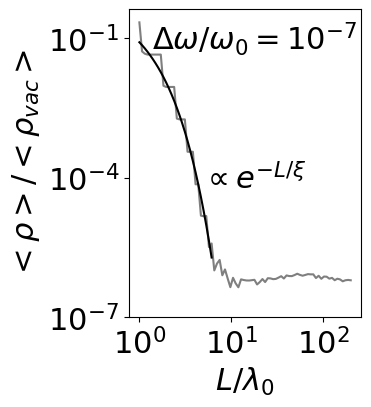

In [13]:
Rlist = np.loadtxt('DATA_PRL/TMcyl_chi4+0j_dwQ1e7_Rsweep0p5to100_logspaced_80pts_gpr1200_R.txt')
invdes_vals = np.loadtxt('DATA_PRL/TMcyl_chi4+0j_dwQ1e7_Rsweep0p5to100_logspaced_80pts_gpr1200_LDOS_sca_enh.txt')
invdes_vals = 1-invdes_vals

plt.figure(figsize=(3,4))
plt.rc('font', size=22)
plt.plot(2*Rlist, invdes_vals, color='#7f7f7f')

#plot slope
end_ind = len(invdes_vals) - 45
ind_width = 20
start_ind = end_ind - ind_width

end_ind = len(invdes_vals) - 52
start_ind = 0
ind_width = end_ind - start_ind
slopeRlist = Rlist[start_ind:end_ind]
# slopeBounds = np.array(list(map(lambda R: fslope(-9, R, Rlist[start_ind], 1.35*invdes_vals[start_ind]), slopeRlist)))
slopeBounds = np.array(list(map(lambda R: fexpslope(1, R, 0.24, 3.0*invdes_vals[start_ind]), slopeRlist)))
plt.plot(2*slopeRlist, slopeBounds, color='black')
plt.annotate('$\propto e^{-L/\\xi}$', (2*Rlist[end_ind - ind_width//8], invdes_vals[end_ind - ind_width//8]), # these are the coordinates to position the label
                 xytext=(35,20), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

plt.annotate('$\Delta\omega/\omega_{0} = 10^{-7}$', (18, 0.058), # these are the coordinates to position the label
                 xytext=(0,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

plt.xscale('log')
plt.yscale('log')
plt.xticks([1,10,100])
plt.yticks([1e-1,1e-4,1e-7])
# plt.title('$\chi = 4 + 0.1i, ~ \Delta\omega/\omega_{0} = \\frac{1}{2\cdot 10^6}$')
plt.xlabel('$L/\lambda_{0}$')
plt.ylabel('$<\\rho>/<\\rho_{vac}>$')
plt.savefig('TMcyl_chi4+0j_Q1e6_Rsweep0p5to100_logspaced_80pts_gpr1200_Qsrc1e6_Rsweep_cylindrical.pdf', bbox_inches='tight')

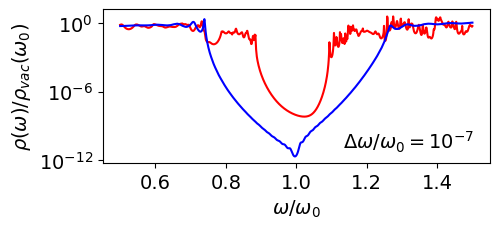

In [14]:
#Combined
###spectrum
filenames = ['DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_periodicfullspace10by10_period1_maxeval500_Wfunc_normalized_vacstart_Qabs5.0e+06_L10.0_optdof_spectrum.txt']
ldos_list = np.loadtxt(filenames[0])
omegas = np.linspace(-1/2, 1/2, len(ldos_list)) + 1
plt.figure(figsize=(5,2))
plt.rc('font', size=14)
plt.plot(omegas, ldos_list, color='red')


####plot circular results
filenames = ['DATA_PRL/TMcyl_chi4+0j_R40_gpr1200_Qsrc5.0e+06_optdof_spectrum.npy']
ldos_list = np.load(filenames[0])
omegas = np.linspace(-1/2, 1/2, len(ldos_list)) + 1
plt.rc('font', size=14)
plt.plot(omegas, ldos_list, color='blue')

#######
# plt.annotate('$L/\lambda_{0} = 6$', (1.32, ldos_list[-1]/10**2), # these are the coordinates to position the label
#                  xytext=(0,0), # distance from text to points (x,y)
#                  textcoords="offset points",
#                  ha='center') # horizontal alignment can be left, right or center

plt.annotate('$\Delta\omega/\omega_{0} = 10^{-7}$', (1.32, 1/10**11), # these are the coordinates to position the label
                 xytext=(0,0), # distance from text to points (x,y)
                 textcoords="offset points",
                 ha='center') # horizontal alignment can be left, right or center

plt.xlabel('$\omega/\omega_{0}$')
plt.ylabel('$\\rho(\omega)/\\rho_{vac}(\omega_{0})$')
# plt.locator_params(axis='y', nbins=6)
# plt.locator_params(axis='x', nbins=6)
plt.yscale('log')
plt.yticks([1e0,1e-6,1e-12])
# plt.xscale('log')
plt.savefig('chi4+0j_circularandperiodic_Qsrc1e6_optdof_spectrum.png', bbox_inches='tight')
plt.savefig('chi4+0j_circularandperiodic_Qsrc1e6_optdof_spectrum.pdf', bbox_inches='tight')
# plt.rc('axes', labelsize=6) 

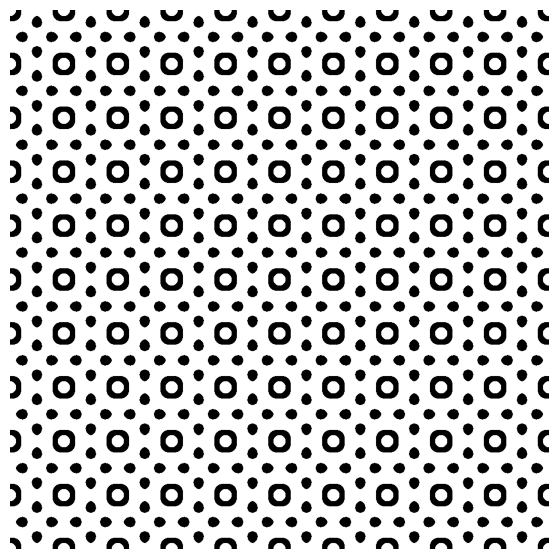

In [15]:
design_file = 'DATA_PRL/TMLDOSmin4+0j_dwQabs1e-1to1e7_periodicfullspace10by10_period1_maxeval500_Wfunc_normalized_vacstart_Qabs5.0e+06_L10.0_optdof.txt'
design = np.loadtxt(design_file)
L = int(np.sqrt(len(design)))
design = design.reshape(L, L)
plt.figure(figsize=((7,7)))
plt.imshow(design,cmap='Greys')
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.savefig('minLDOS_TM_chi4+0j_Qsrc5.0e+06_L5.0_period1lambda.pdf', bbox_inches='tight')

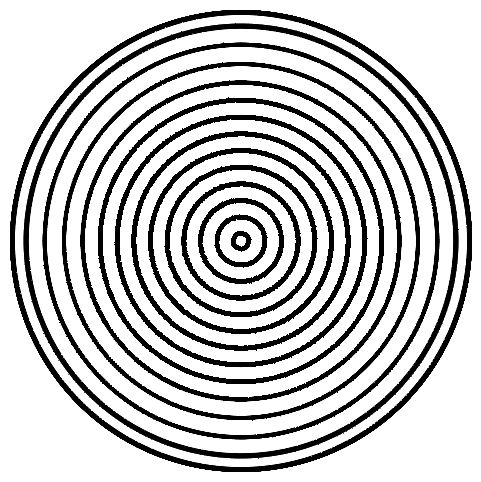

In [16]:
des_list = np.loadtxt('DATA_PRL/TMcyl_chi4+0j_R5_gpr1200_Qsrc5.0e+06_optdof.txt')
# print('des_list len:', len(des_list))
# des_list = np.loadtxt('TMcyl_chi4+1e-1j_R2p5_gpr1200_Qsrc1.0e+06_optdof.txt')
###structure
gpr = 1200
fig, ax1 = plt.subplots(1, 1, figsize=(6,6))
ax1 = plt.subplot(111, projection='polar')
r_list = np.linspace(0, 1, len(des_list)) + gpr//2

azm = np.linspace(0, 2 * np.pi, 400)
r, th = np.meshgrid(10*r_list, azm)
z = np.tile(np.absolute(des_list), (r.shape[0], 1))

col_map = plt.cm.get_cmap('gray')
col_rev = col_map.reversed()
ax1.pcolormesh(th, r, z, shading='auto', cmap=col_rev)
ax1.set_rticks([])
ax1.grid(False)
ax1.axis("off")
plt.savefig('chi4+0j_R5_dwQsrc1e6_optdof.png', bbox_inches='tight')
# ax1.colorbar(label='packing fraction')

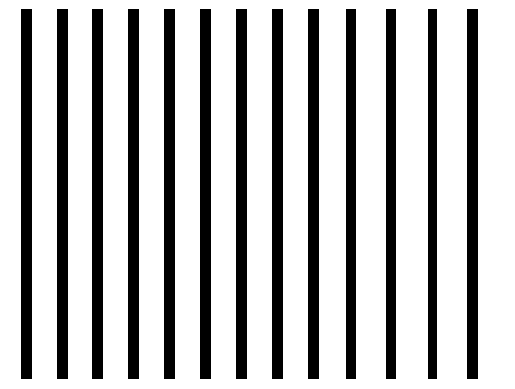

In [17]:
import matplotlib.patches as mpatches
indGrating = np.nonzero(des_list.round())
gratings = consecutive(indGrating[0])

plt.figure()
ax = plt.axes()
for i in range(len(gratings) - 1):
    xL = gratings[i][0]
    xR = gratings[i][-1]
    art = mpatches.Rectangle((xL/len(des_list), 0), (xR - xL + 1)/len(des_list), 1.0, ec="none", color='black')
    ax.add_artist(art)
plt.axis('off')
plt.savefig('chi4+0j_R5_dwQsrc1e6_optdof_radial_rings.pdf', bbox_inches='tight')

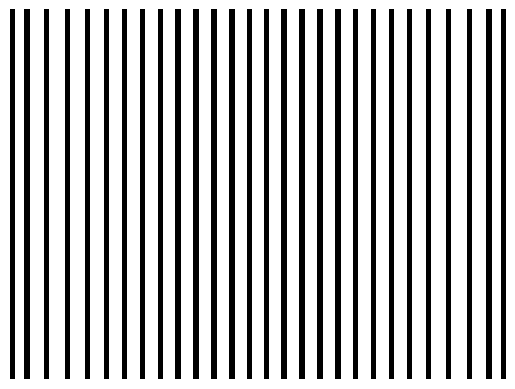

In [18]:
import matplotlib.patches as mpatches
indGrating = np.nonzero(des_list.round())
gratings = consecutive(indGrating[0])

plt.figure()
ax = plt.axes()
for i in range(len(gratings)):
    xL = gratings[i][0]
    xR = gratings[i][-1]
    art = mpatches.Rectangle((xL/len(des_list), 0), (xR - xL + 1)/len(des_list), 1.0, ec="none", color='black')
    ax.add_artist(art)
    art = mpatches.Rectangle((-xL/len(des_list), 0), -(xR - xL + 1)/len(des_list), 1.0, ec="none", color='black')
    ax.add_artist(art)
plt.xlim(-1,1)
plt.axis('off')
plt.savefig('chi4+0j_R5_dwQsrc1e6_optdof_radial_rings_twosides.pdf', bbox_inches='tight')

In [19]:
gratings[0]

array([138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163,
       164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176,
       177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
       190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,
       203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,
       216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228,
       229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241,
       242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254,
       255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267,
       268])

In [20]:
0.5/gpr + gratings[0][-1]/gpr

0.22375

In [21]:
(0.5/gpr + gratings[0][0]/gpr)*2

0.23083333333333333

In [22]:
(gratings[3][0] - gratings[2][0] + 1)/1200.0 #separation between rings

0.3616666666666667

In [23]:
(1 + np.sqrt(1 + 4))/np.sqrt(1 + 4)/4 #quarter-wave separation

0.36180339887498947

In [24]:
(gratings[4][-1] - gratings[4][0] + 1)/1200.0 #thickness of ring

0.1125

In [25]:
1/4/np.sqrt(5) #thickness if quarter-wave plate

0.11180339887498948

In [26]:
(gratings[3][0] - gratings[2][-1] + 1)/1200.0
#thickness of vac between rings should be 0.25 for vacuum if quarter-wave plate

0.25083333333333335